# CLUSTERING ANALYSIS 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_excel('EastWestAirlines.xlsx')
df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
## pandas to read the sheet named 'data' from the Excel file
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA & Data Preprocessing:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [8]:
#Check for Missing Values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
## No missing values found — no further action needed.

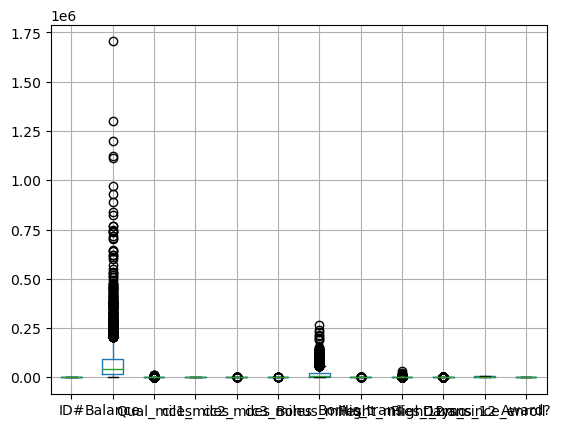

In [10]:
df.boxplot()
plt.show()

In [11]:
def outlier_capping(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]) and col != 'ID#':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] > upper, upper,
                        np.where(df[col] < lower, lower, df[col]))

outlier_capping(df)

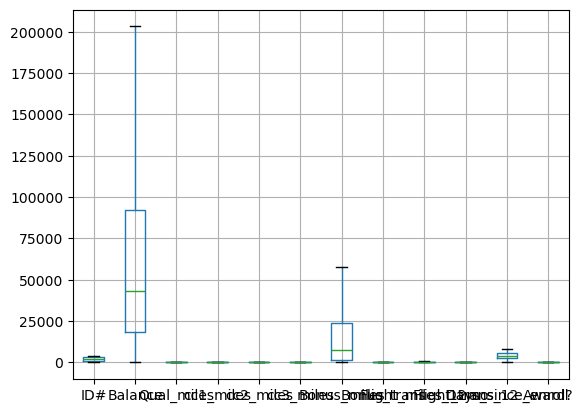

In [12]:
df.boxplot()
plt.show()

### Scale the Features

In [14]:
from sklearn.preprocessing import StandardScaler

# Exclude 'ID#' for scaling
features = df.drop(columns=['ID#'])

# Standardize
scaler = StandardScaler()
scaled_array = scaler.fit_transform(features)

# Recreate DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=features.columns)

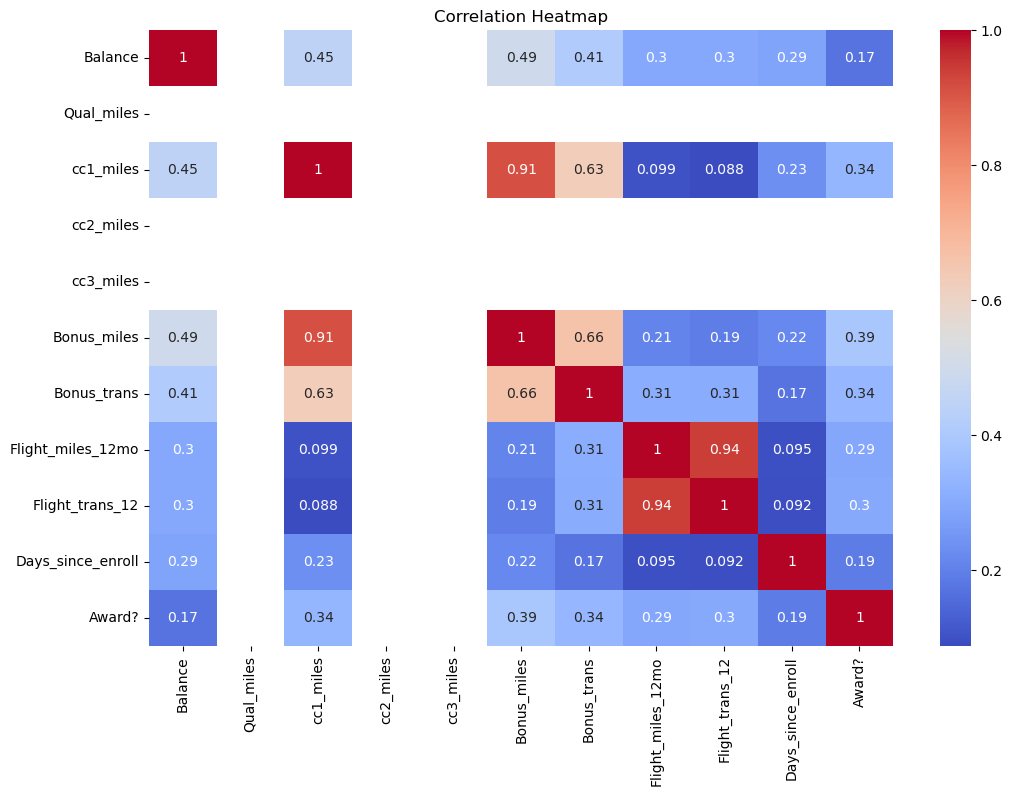

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

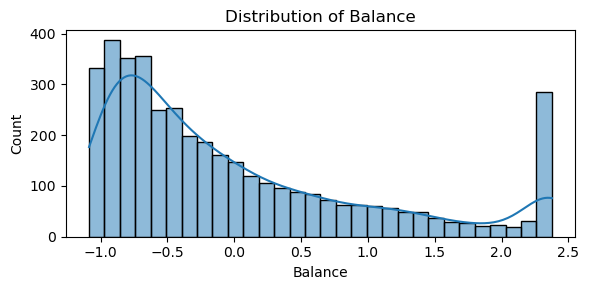

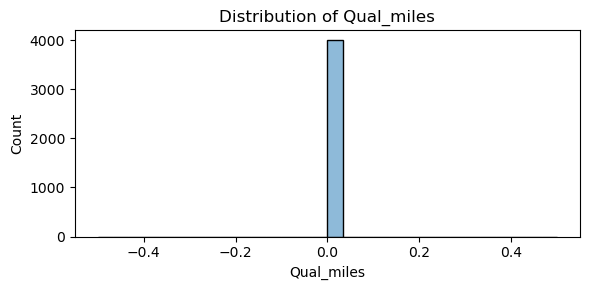

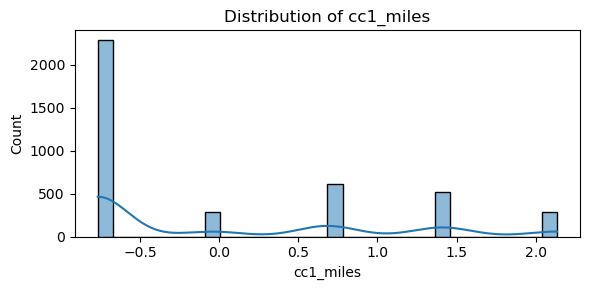

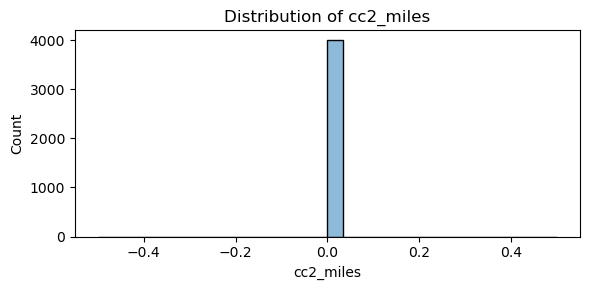

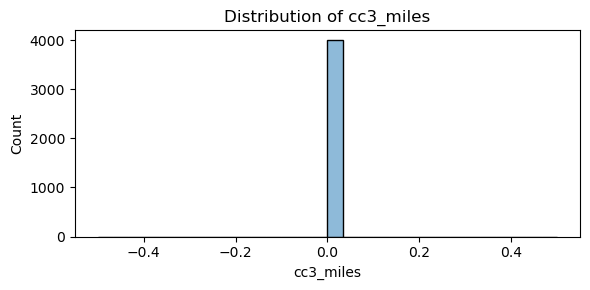

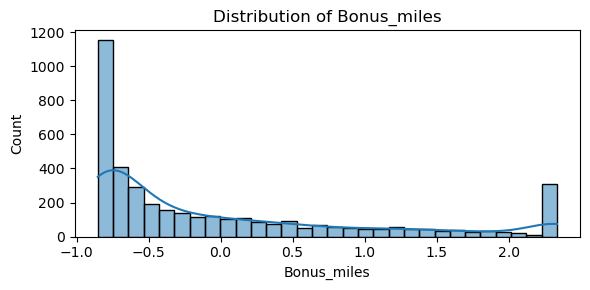

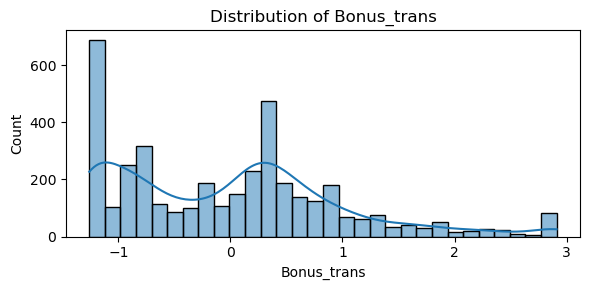

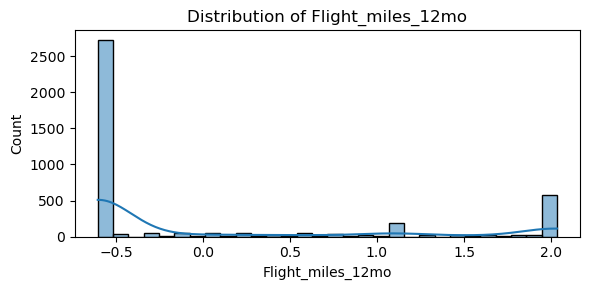

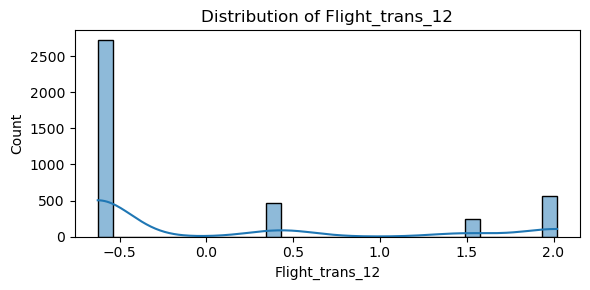

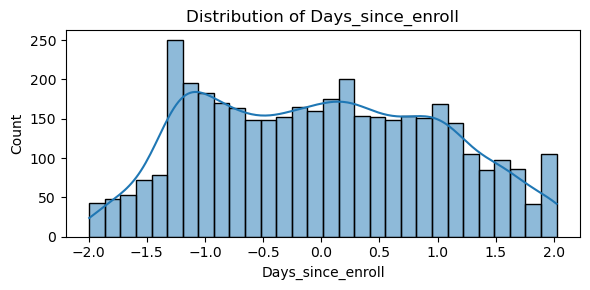

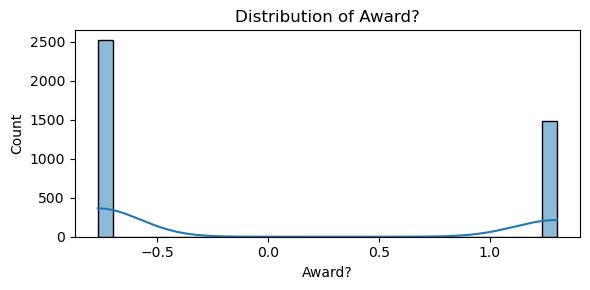

In [16]:
# Distribution Plots

for col in df_scaled.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Visualize Hidden Patterns

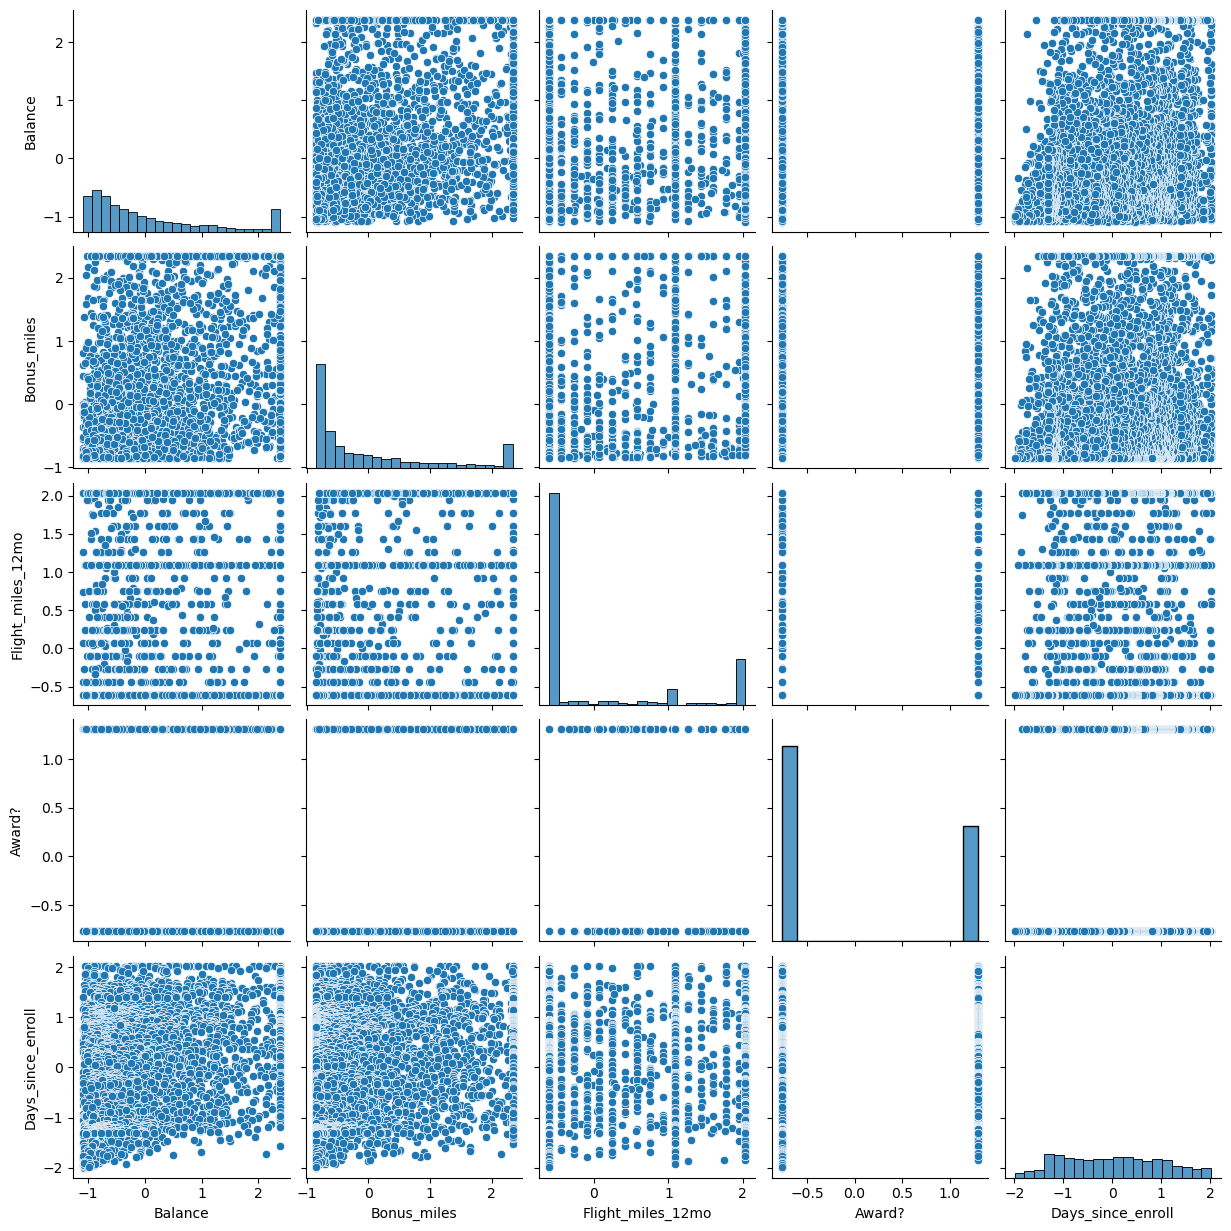

In [18]:
# Pairplot for Selected Features
sns.pairplot(df_scaled[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Award?', 'Days_since_enroll']])
plt.show()

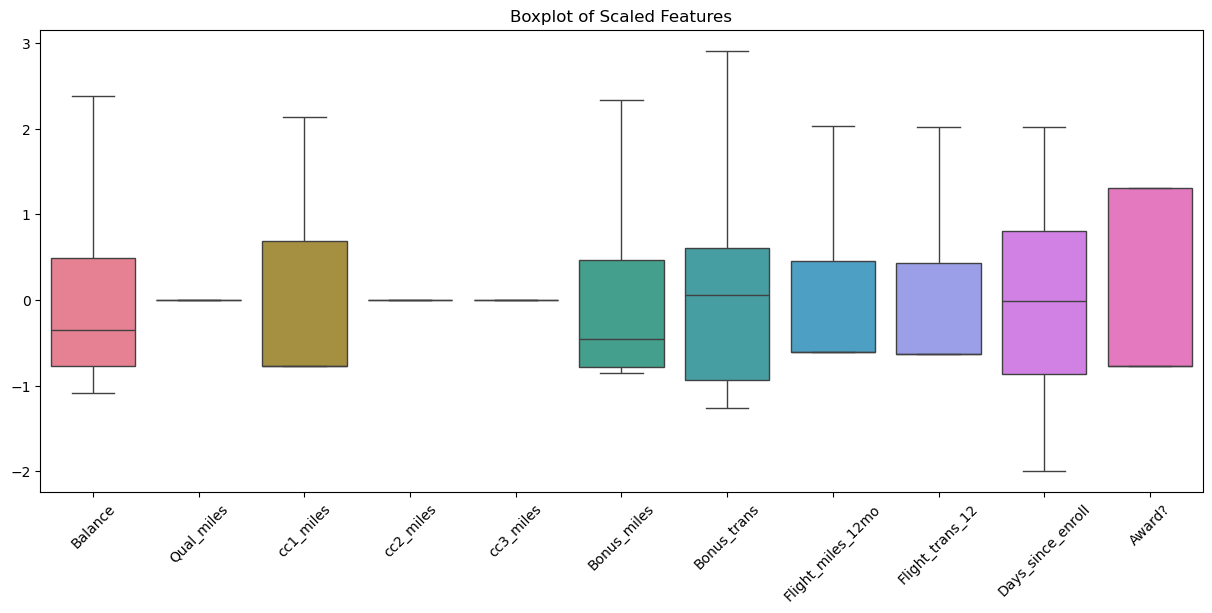

In [19]:
# Boxplots to See Spread and Outliers

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scaled)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=45)
plt.show()

# K-Means Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df_scaled)
cluster=kmeans.fit(features)
# Save labels to df_scaled
df_scaled['KMeans_Cluster'] = kmeans_labels

In [22]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [23]:
kmeans.inertia_

2437718699739.337

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(features,cluster.labels_)

0.5416257053340576

In [25]:
features['cluster']= cluster.labels_

In [26]:
features[features.cluster==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,97752.0,0.0,4.0,1.0,1.0,43300.00,26.0,777.5,2.5,6935.0,1.0,0
6,84914.0,0.0,3.0,1.0,1.0,27482.00,25.0,0.0,0.0,6994.0,0.0,0
9,104860.0,0.0,3.0,1.0,1.0,28426.00,28.0,777.5,2.5,6931.0,1.0,0
11,96522.0,0.0,5.0,1.0,1.0,57626.25,19.0,0.0,0.0,6924.0,1.0,0
16,51890.0,0.0,4.0,1.0,1.0,48963.00,16.0,0.0,0.0,6910.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3974,58387.0,0.0,3.0,1.0,1.0,14581.00,38.0,0.0,0.0,1435.0,0.0,0
3979,57793.0,0.0,3.0,1.0,1.0,20959.00,15.0,777.5,2.5,1424.0,1.0,0
3985,59017.0,0.0,4.0,1.0,1.0,34746.00,25.0,0.0,0.0,1418.0,0.0,0
3995,64385.0,0.0,1.0,1.0,1.0,981.00,5.0,0.0,0.0,1395.0,1.0,0


In [27]:
features.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'cluster'],
      dtype='object')

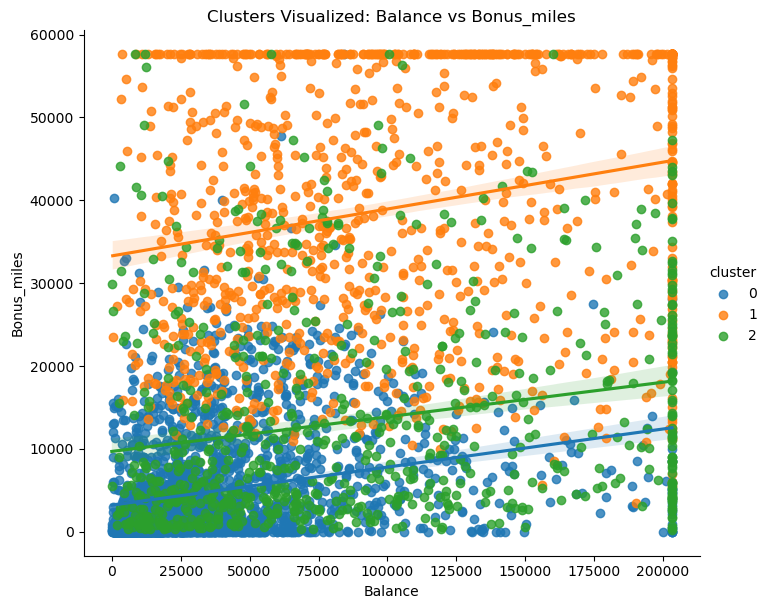

In [28]:
features = df.copy()
features['cluster'] = df_scaled['KMeans_Cluster']

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=features, x='Balance', y='Bonus_miles', hue='cluster', fit_reg=True, height=6, aspect=1.2)
plt.title("Clusters Visualized: Balance vs Bonus_miles")
plt.show()

In [29]:
cluster.cluster_centers_

array([[8.31471397e+04, 0.00000000e+00, 2.65622202e+00, 1.00000000e+00,
        1.00000000e+00, 2.27911670e+04, 1.46034020e+01, 2.26885855e+02,
        7.34109221e-01, 4.38291764e+03, 4.15398389e-01],
       [1.78349263e+05, 0.00000000e+00, 3.09724473e+00, 1.00000000e+00,
        1.00000000e+00, 3.14053549e+04, 1.75623987e+01, 3.27580227e+02,
        1.08022690e+00, 5.18055105e+03, 5.34846029e-01],
       [2.29995249e+04, 0.00000000e+00, 1.48256071e+00, 1.00000000e+00,
        1.00000000e+00, 7.41398433e+03, 8.26622517e+00, 1.13243267e+02,
        3.88079470e-01, 3.69889625e+03, 3.03311258e-01]])

In [30]:
kmeans.inertia_

2437718699739.337

## Elbow method to find optimal k

In [32]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

In [33]:
kmeans.inertia_

10071.984777007956

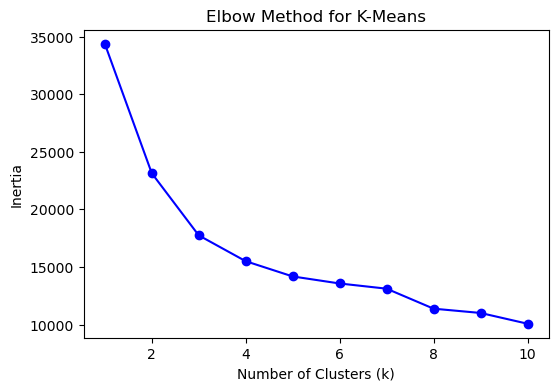

In [34]:
# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

In [35]:
# Apply K-Means with Optimal k (say k = 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

## Hierarchical Clustering

### Dendrogram

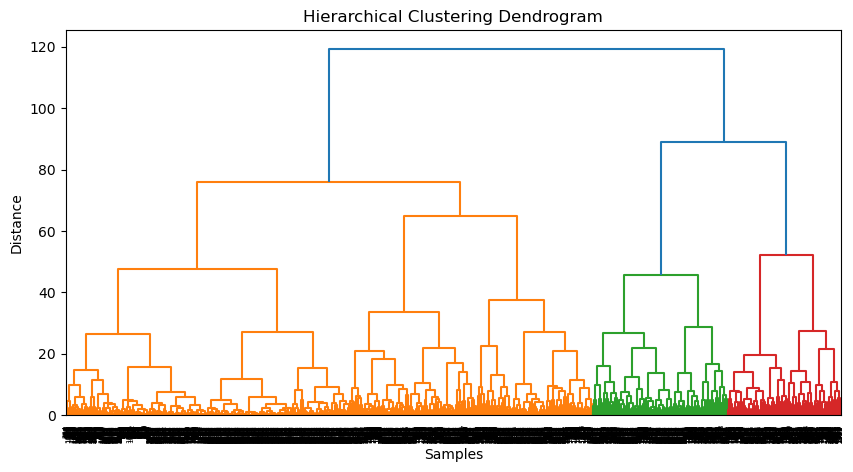

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled.iloc[:, :-1], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Agglomerative Clustering (e.g., 5 clusters)

In [40]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
df_scaled['Hierarchical_Cluster'] = hc.fit_predict(df_scaled.iloc[:, :-2])

### DBSCAN Clustering

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find optimal eps (use k-distance plot if needed)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled.iloc[:, :-3])

## K-Means Clustering – Elbow Curve & Silhouette Score

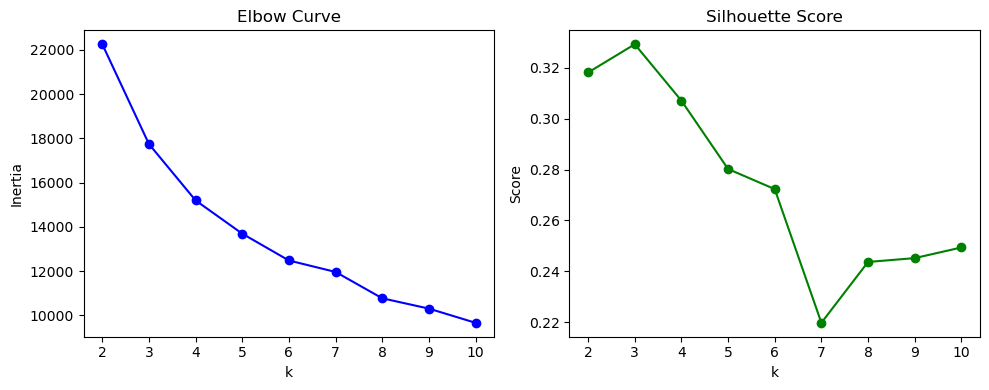

In [44]:
inertia = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled.iloc[:, :-3])
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled.iloc[:, :-3], labels))

# Plot Elbow & Silhouette Score
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

## Hierarchical Clustering – Linkage Variants

In [46]:
linkages = ['ward', 'complete', 'average']

for link in linkages:
    hc = AgglomerativeClustering(n_clusters=5, linkage=link)
    labels = hc.fit_predict(df_scaled.iloc[:, :-3])
    score = silhouette_score(df_scaled.iloc[:, :-3], labels)
    print(f"Linkage: {link}, Silhouette Score: {score:.3f}")

Linkage: ward, Silhouette Score: 0.233
Linkage: complete, Silhouette Score: 0.105
Linkage: average, Silhouette Score: 0.279


## DBSCAN – Tuning eps and min_samples

In [48]:
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_scaled.iloc[:, :-3])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(df_scaled.iloc[:, :-3], labels)
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) --> Clusters: {n_clusters}, Silhouette: {score:.3f}")
        else:
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) --> Clusters: {n_clusters} [Too few to evaluate]")


DBSCAN (eps=0.5, min_samples=3) --> Clusters: 96, Silhouette: -0.203
DBSCAN (eps=0.5, min_samples=5) --> Clusters: 33, Silhouette: -0.166
DBSCAN (eps=0.5, min_samples=10) --> Clusters: 11, Silhouette: -0.214
DBSCAN (eps=1.0, min_samples=3) --> Clusters: 21, Silhouette: -0.003
DBSCAN (eps=1.0, min_samples=5) --> Clusters: 16, Silhouette: -0.009
DBSCAN (eps=1.0, min_samples=10) --> Clusters: 12, Silhouette: -0.037
DBSCAN (eps=1.5, min_samples=3) --> Clusters: 3, Silhouette: 0.187
DBSCAN (eps=1.5, min_samples=5) --> Clusters: 2, Silhouette: 0.210
DBSCAN (eps=1.5, min_samples=10) --> Clusters: 2, Silhouette: 0.210
DBSCAN (eps=2.0, min_samples=3) --> Clusters: 2, Silhouette: 0.214
DBSCAN (eps=2.0, min_samples=5) --> Clusters: 2, Silhouette: 0.214
DBSCAN (eps=2.0, min_samples=10) --> Clusters: 2, Silhouette: 0.214


## K-Means Clustering – Cluster Analysis

In [50]:
# Append KMeans cluster labels to original DataFrame
df['KMeans_Cluster'] = df_scaled['KMeans_Cluster']

# Group by clusters and calculate mean for each feature
kmeans_summary = df.groupby('KMeans_Cluster').mean()
print(kmeans_summary)

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1504.247222  123385.443750         0.0   4.016667        1.0   
1               2433.103201   27799.819399         0.0   1.024167        1.0   
2               1527.042722  108316.095728         0.0   4.093354        1.0   
3               1836.748049   59967.033166         0.0   2.121516        1.0   
4               2034.540587   79074.766839         0.0   1.264249        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  44427.662500    25.455556         668.412500   
1                     1.0   2136.131287     4.044415          28.006532   
2                     1.0  41133.278481    17.735759          45.458861   
3                     1.0  12801.956800    14.376812          15

## Hierarchical Clustering – Cluster Analysis

In [52]:
df['Hierarchical_Cluster'] = df_scaled['Hierarchical_Cluster']
hc_summary = df.groupby('Hierarchical_Cluster').mean()
print(hc_summary)

                              ID#        Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                      
0                     2171.522861   22885.301622         0.0   1.029499   
1                     2149.516888   76350.059110         0.0   2.093142   
2                     1552.012522  107397.245975         0.0   4.313059   
3                     2373.718816   44405.665962         0.0   1.021142   
4                     1612.391167  107800.248028         0.0   2.998423   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
0                           1.0        1.0   2340.375369     3.874631   
1                           1.0        1.0  12511.855937    14.029683   
2                           1.0        1.0  45329.672630    18.391771   
3                           1.0        1.0   4154.786469     6.744186   
4                           1.0     

## DBSCAN – Cluster Analysis

In [54]:
df['DBSCAN_Cluster'] = df_scaled['DBSCAN_Cluster']
db_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print(db_summary)

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                
0               2014.164493  63634.491474         0.0   2.059178        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
0                     1.0  15332.493919    11.414243         176.875627   

                Flight_trans_12  Days_since_enroll    Award?  KMeans_Cluster  \
DBSCAN_Cluster                                                                 
0                      0.587763        4119.725176  0.368857         1.95336   

                Hierarchical_Cluster  
DBSCAN_Cluster                        
0                           1.507773  


# PCA for Dimensionality Reduction

In [56]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.iloc[:, :-3])  # exclude cluster columns

# Create a PCA DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['KMeans'] = df_scaled['KMeans_Cluster']
pca_df['Hierarchical'] = df_scaled['Hierarchical_Cluster']
pca_df['DBSCAN'] = df_scaled['DBSCAN_Cluster']

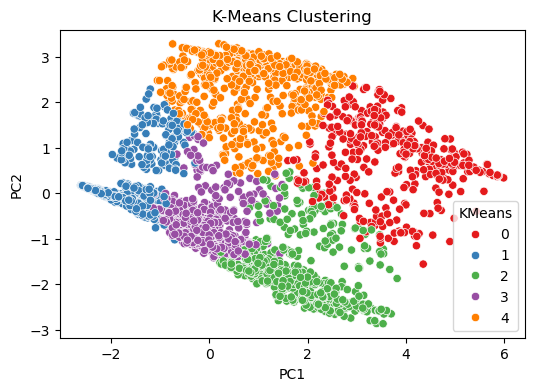

In [57]:
# Plot K-Means Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans', palette='Set1')
plt.title("K-Means Clustering")
plt.show()

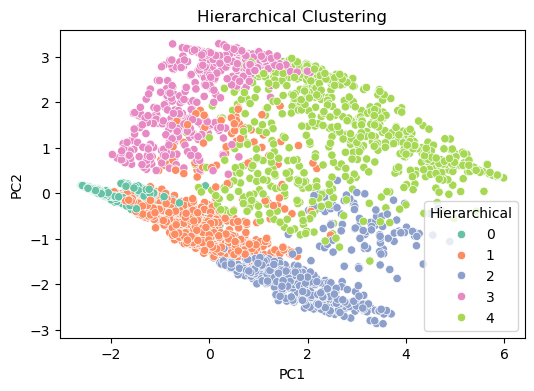

In [58]:
# Plot Hierarchical Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical', palette='Set2')
plt.title("Hierarchical Clustering")
plt.show()

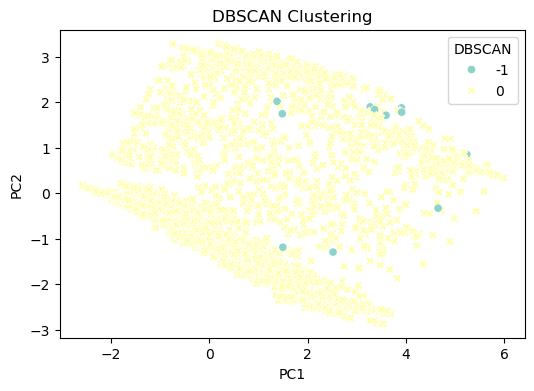

In [59]:
#  Plot DBSCAN Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN', palette='Set3', style='DBSCAN')
plt.title("DBSCAN Clustering")
plt.show()

In [60]:
# Silhouette Score for K-Means
kmeans_score = silhouette_score(df_scaled.iloc[:, :-3], df_scaled['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_score:.3f}")

Silhouette Score for K-Means: 0.240


In [61]:
# Silhouette Score for Hierarchical Clustering
hc_score = silhouette_score(df_scaled.iloc[:, :-3], df_scaled['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {hc_score:.3f}")

Silhouette Score for Hierarchical Clustering: 0.192


In [62]:
# Silhouette Score for DBSCAN
# Exclude noise points (-1) for silhouette score
mask = df_scaled['DBSCAN_Cluster'] != -1
if df_scaled[mask]['DBSCAN_Cluster'].nunique() > 1:
    dbscan_score = silhouette_score(df_scaled.loc[mask, df_scaled.columns[:-3]], df_scaled.loc[mask, 'DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN (excluding noise): {dbscan_score:.3f}")
else:
    print("DBSCAN found too few clusters to evaluate silhouette score.")

DBSCAN found too few clusters to evaluate silhouette score.


## - Score > 0.7 → Strong structure
## - 0.5–0.7 → Reasonable structure
## - 0.25–0.5 → Weak structure
## - < 0.25 → Possibly overlapping clusters